#### Mesures de potentiels hydriques du 2 juin

Infos

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
df=pd.read_csv('data\data_potentiels_hydriques_0206.csv')
df['Parcelle']=df['Station']

def regrouper_station(station):
    if station.startswith('AV'):
        return 'AV'
    if station.startswith('RB'):
        return 'RB'
    if station.startswith('RH'):
        return 'RH'
    if station.startswith('TA'):
        return 'TA'
    if station.startswith('TR'):
        return 'TR'
    return None

df['Station'] = df['Parcelle'].apply(regrouper_station)

df.head()

,Station,Psi,Unnamed: 2,Unnamed: 3,Chloro,Unnamed: 5,Parcelle
0,RB,22.5,21.5,22.5,55.4,47.9,RB1
1,RB,21.5,24.0,NaN,49.1,50.7,RB2
2,RB,23.0,25.0,NaN,41.8,46.6,RB3
3,RB,21.0,21.0,NaN,50.6,51.8,RB4
4,RH,18.5,21.0,21.0,46.1,42.3,RH1


In [44]:
df_potentiel_moy = df.melt(
    id_vars=['Parcelle'],
    value_vars=['Psi', 'Unnamed: 2', 'Unnamed: 3'],
    var_name='Mesure',
    value_name='Potentiel_hydrique'
)
df_pot_moy = df_potentiel_moy.groupby('Parcelle')['Potentiel_hydrique'].mean().reset_index()

df_pot_moy['Station'] = df_pot_moy['Parcelle'].apply(regrouper_station)

df_pot_moy.head()

,Parcelle,Potentiel_hydrique,Station
0,AV1,31.250000,AV
1,AV2,27.000000,AV
2,AV3,26.500000,AV
3,AV4,29.750000,AV
4,RB1,22.166667,RB


In [45]:
# Potentiels hydriques - une ligne = une mesure

psi_cols = ['Psi', 'Unnamed: 2', 'Unnamed: 3']

df_potentiel = df.melt(
    id_vars='Station',
    value_vars=psi_cols,
    var_name='Mesure',
    value_name='Potentiel_hydrique'
).dropna(subset=['Potentiel_hydrique'])

ordre=['RB','RH','TR','TA','AV']

df_potentiel['Station'] = pd.Categorical(df_potentiel['Station'], categories=ordre, ordered=True)
df_potentiel = df_potentiel.sort_values('Station').reset_index(drop=True)

df_pot_moy['Station'] = pd.Categorical(df_pot_moy['Station'], categories=ordre, ordered=True)
df_pot_moy = df_pot_moy.sort_values('Station').reset_index(drop=True)

df_potentiel



,Station,Mesure,Potentiel_hydrique
0,RB,Psi,22.5
1,RB,Unnamed: 3,22.5
2,RB,Unnamed: 2,21.0
3,RB,Unnamed: 2,25.0
4,RB,Unnamed: 2,24.0
5,RB,Unnamed: 2,21.5
6,RB,Psi,23.0
7,RB,Psi,21.5
8,RB,Psi,21.0
9,RH,Unnamed: 3,21.0


Text(0.5, 1.0, 'Potentiels hydriques')

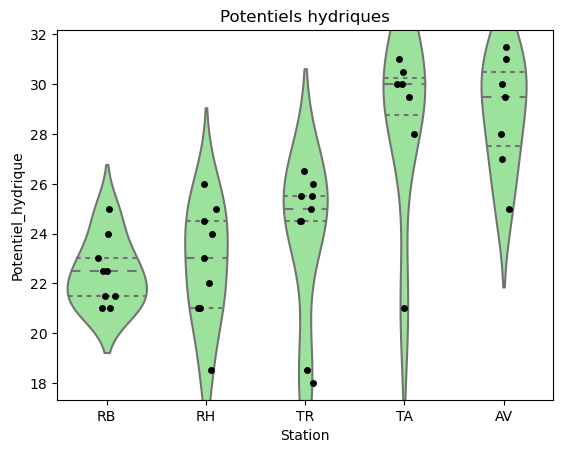

In [46]:
# Plot sous forme d'un violinplot

df_violin = df_potentiel

sns.violinplot(x='Station',y='Potentiel_hydrique',data=df_violin, split=True, inner='quartile', color='lightgreen')
sns.stripplot(x='Station', y='Potentiel_hydrique', data=df_violin, color='black')
plt.title('Potentiels hydriques')

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    AV     RB  -6.4127 0.0002 -10.2016 -2.6238   True
    AV     RH  -6.0794 0.0005  -9.8682 -2.2905   True
    AV     TA  -0.2857 0.9996  -4.3044   3.733  False
    AV     TR  -5.0794  0.004  -8.8682 -1.2905   True
    RB     RH   0.3333 0.9988  -3.2108  3.8775  False
    RB     TA    6.127 0.0004   2.3381  9.9159   True
    RB     TR   1.3333 0.8155  -2.2108  4.8775  False
    RH     TA   5.7937 0.0009   2.0048  9.5825   True
    RH     TR      1.0 0.9258  -2.5442  4.5442  False
    TA     TR  -4.7937 0.0073  -8.5825 -1.0048   True
-----------------------------------------------------


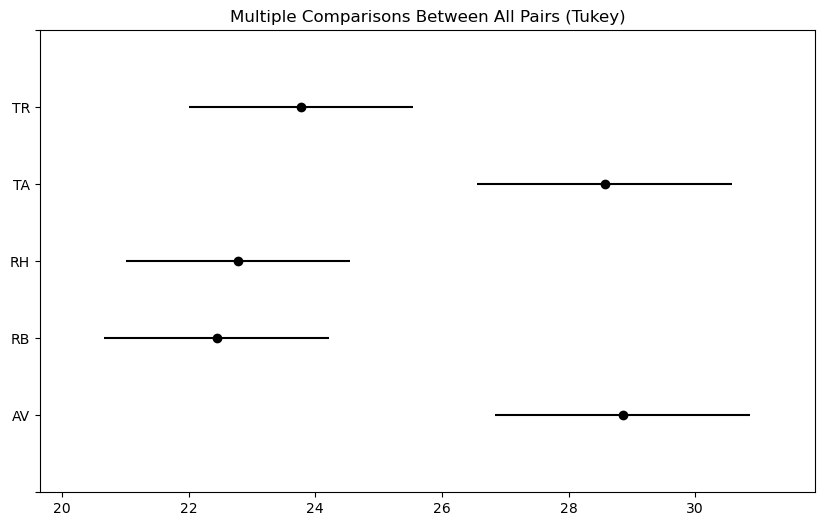

In [47]:
# Tukey multidimensionnel

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey=pairwise_tukeyhsd(endog=df_potentiel['Potentiel_hydrique'], groups=df_potentiel['Station'], alpha=0.05)

print(tukey)

tukey.plot_simultaneous()
plt.show()

Text(0.5, 1.0, 'Potentiels hydriques moyennés par parcelle')

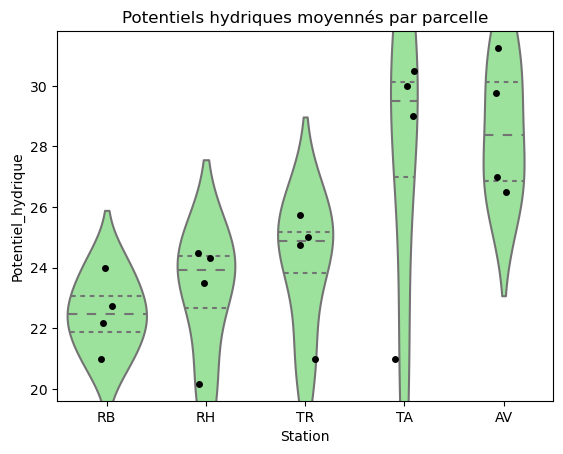

In [48]:
# Plot sous forme d'un violinplot - moyenné par parcelle

df_violin = df_pot_moy

sns.violinplot(x='Station',y='Potentiel_hydrique',data=df_violin, split=True, inner='quartile', color='lightgreen')
sns.stripplot(x='Station', y='Potentiel_hydrique', data=df_violin, color='black')
plt.title('Potentiels hydriques moyennés par parcelle')

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    AV     RB  -6.4127 0.0002 -10.2016 -2.6238   True
    AV     RH  -6.0794 0.0005  -9.8682 -2.2905   True
    AV     TA  -0.2857 0.9996  -4.3044   3.733  False
    AV     TR  -5.0794  0.004  -8.8682 -1.2905   True
    RB     RH   0.3333 0.9988  -3.2108  3.8775  False
    RB     TA    6.127 0.0004   2.3381  9.9159   True
    RB     TR   1.3333 0.8155  -2.2108  4.8775  False
    RH     TA   5.7937 0.0009   2.0048  9.5825   True
    RH     TR      1.0 0.9258  -2.5442  4.5442  False
    TA     TR  -4.7937 0.0073  -8.5825 -1.0048   True
-----------------------------------------------------


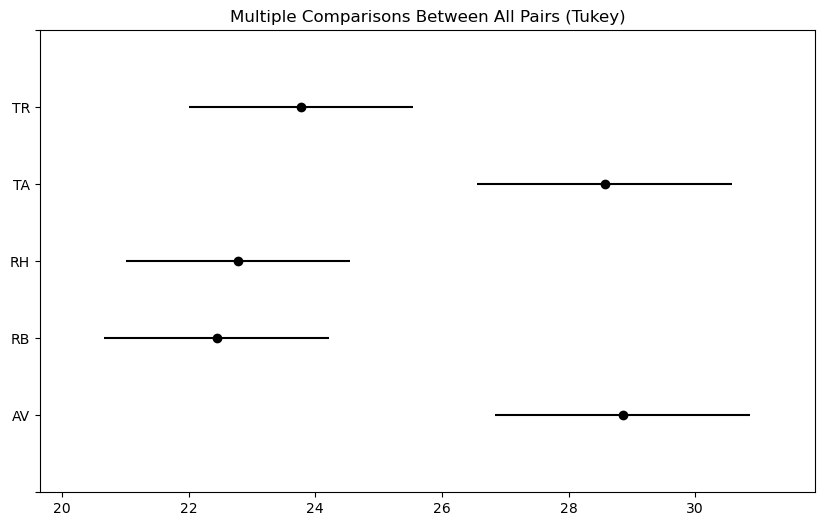

In [49]:
tukey_moy=pairwise_tukeyhsd(endog=df_potentiel['Potentiel_hydrique'], groups=df_potentiel['Station'], alpha=0.05)

print(tukey_moy)

tukey_moy.plot_simultaneous()
plt.show()

In [57]:
# Chlorophylie

chloro_cols = ['Chloro', 'Unnamed: 5']

df_chloro = df.melt(
    id_vars='Station',
    value_vars=chloro_cols,
    var_name='Mesure',
    value_name='Chlorophylle'
).dropna(subset=['Chlorophylle'])

df_chloro['Station']= pd.Categorical(df_chloro['Station'], categories=ordre, ordered=True)
df_chloro=df_chloro.sort_values('Station').reset_index(drop=True)

df_chloro.head()



,Station,Mesure,Chlorophylle
0,RB,Chloro,55.4
1,RB,Chloro,49.1
2,RB,Chloro,41.8
3,RB,Chloro,50.6
4,RB,Unnamed: 5,51.8


Text(0.5, 1.0, 'Chlorophyllie')

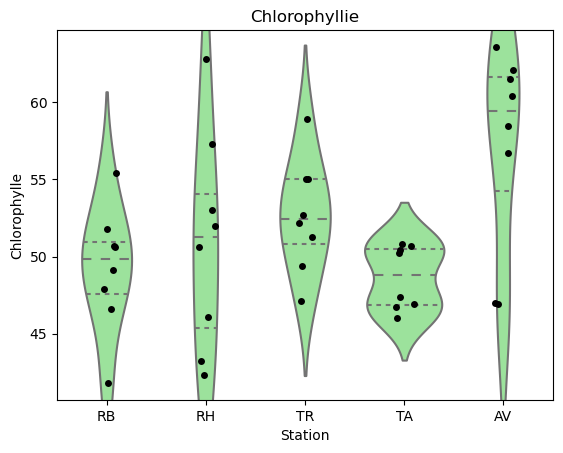

In [58]:
# Plot sous forme d'un violinplot - moyenné par parcelle

df_violin = df_chloro

sns.violinplot(x='Station',y='Chlorophylle',data=df_violin, split=True, inner='quartile', color='lightgreen')
sns.stripplot(x='Station', y='Chlorophylle', data=df_violin, color='black')
plt.title('Chlorophyllie')

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    AV     RB    -7.85 0.0278  -15.083  -0.617   True
    AV     RH   -6.175 0.1248  -13.408   1.058  False
    AV     TA    -8.45 0.0153  -15.683  -1.217   True
    AV     TR  -4.3875 0.4214 -11.6205  2.8455  False
    RB     RH    1.675 0.9624   -5.558   8.908  False
    RB     TA     -0.6 0.9992   -7.833   6.633  False
    RB     TR   3.4625 0.6464  -3.7705 10.6955  False
    RH     TA   -2.275 0.8933   -9.508   4.958  False
    RH     TR   1.7875 0.9527  -5.4455  9.0205  False
    TA     TR   4.0625 0.4982  -3.1705 11.2955  False
-----------------------------------------------------


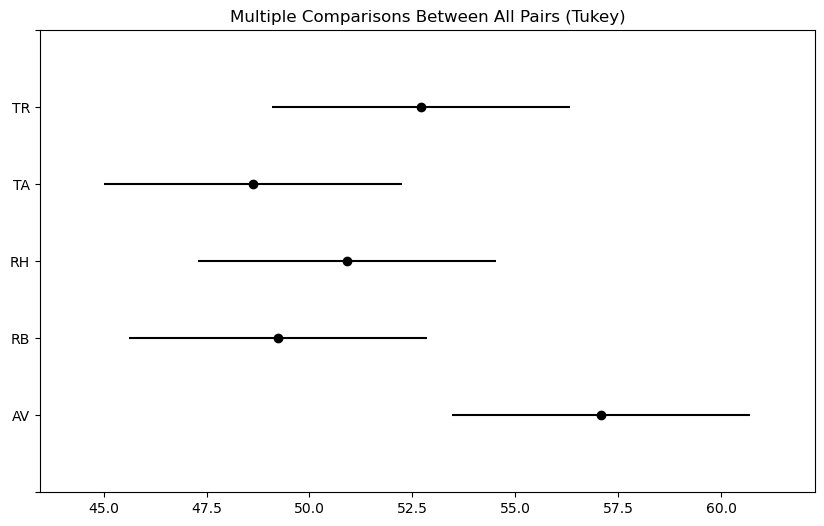

In [59]:
tukey_chlor=pairwise_tukeyhsd(endog=df_chloro['Chlorophylle'], groups=df_chloro['Station'], alpha=0.05)

print(tukey_chlor)

tukey_chlor.plot_simultaneous()
plt.show()